## AoL Project Machine Learning

Anggota Kelompok :

Alisha Zahra Saadiya - 2501971742

Edrick Setiawan - 2540124021

Gregory Nicolla - 2501962340

### Management Data

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Import Dataset
pollutant = pd.read_csv("pollutantjogja_index.csv")
pollutant.head()

,Date,PM10,SO2,CO,O3,NO2,Max,Critical Component,Category
0,1/1/2020,30,2,69,19,0,69,CO,Moderate
1,1/2/2020,16,2,58,33,0,58,CO,Moderate
2,1/3/2020,12,2,46,18,0,46,CO,Good
3,1/4/2020,8,2,84,29,0,84,CO,Moderate
4,1/5/2020,8,3,50,0,0,50,CO,Good


## Preprocessing

In [ ]:
# Check Missing Value
pollutant.count().isna()

Date                  False
PM10                  False
SO2                   False
CO                    False
O3                    False
NO2                   False
Max                   False
Critical Component    False
Category              False
dtype: bool

In [ ]:
pollutant.isnull().sum()

Date                  0
PM10                  0
SO2                   0
CO                    0
O3                    0
NO2                   0
Max                   0
Critical Component    0
Category              0
dtype: int64

Karena semua kolom False, maka itu menandakan bahwa tidak ada missing value di dalam data "pollutantjogja_index.csv"

# EDA

<Axes: >

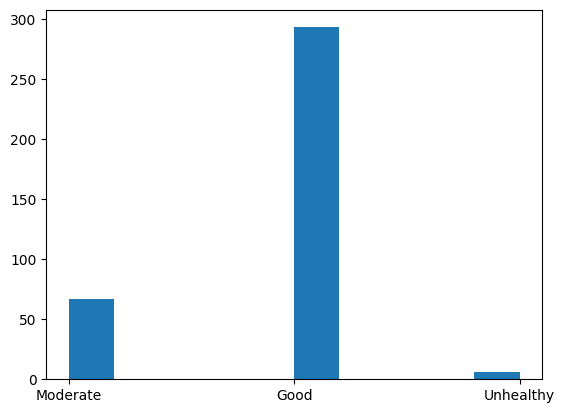

In [ ]:
pollutant['Category'].hist(grid = False)

pada histogram diatas, terdapat imbalance data sehingga kategori unhealthy harus dihapus dari data.

In [ ]:
index_def = pollutant[(pollutant['Category'] == 'Unhealthy')].index
pollutant = pollutant.drop(index_def)
pollutant.head()

,Date,PM10,SO2,CO,O3,NO2,Max,Critical Component,Category
0,1/1/2020,30,2,69,19,0,69,CO,Moderate
1,1/2/2020,16,2,58,33,0,58,CO,Moderate
2,1/3/2020,12,2,46,18,0,46,CO,Good
3,1/4/2020,8,2,84,29,0,84,CO,Moderate
4,1/5/2020,8,3,50,0,0,50,CO,Good


<Axes: xlabel='Category', ylabel='count'>

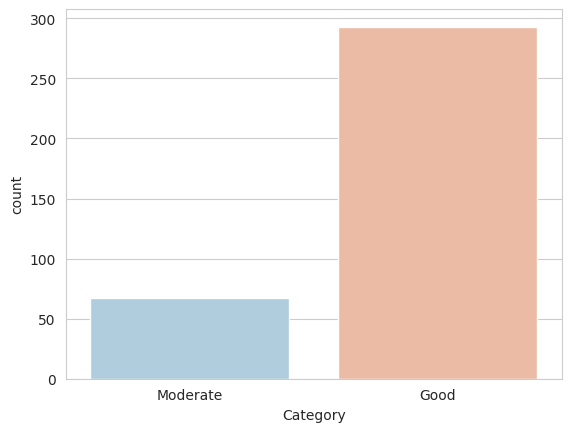

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Category',data=pollutant, palette='RdBu_r')

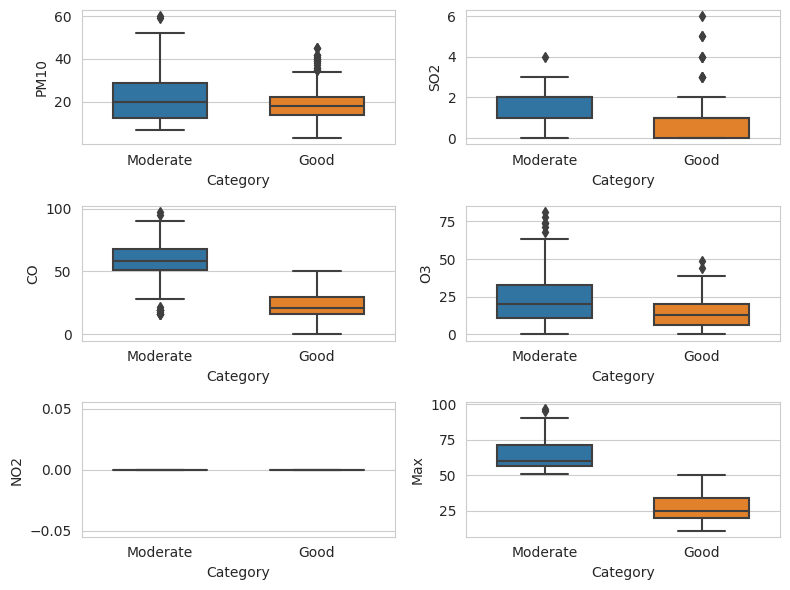

In [ ]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize =(8, 6), sharey = False)
sns.boxplot(data = pollutant, x = "Category", y = 'PM10', width = 0.6, ax = axes[0, 0])
sns.boxplot(data = pollutant, x = "Category", y = 'SO2', width = 0.6, ax = axes[0, 1])
sns.boxplot(data = pollutant, x = "Category", y = 'CO', width = 0.6, ax = axes[1, 0])
sns.boxplot(data = pollutant, x = "Category", y = 'O3', width = 0.6, ax = axes[1, 1])
sns.boxplot(data = pollutant, x = "Category", y = 'NO2', width = 0.6, ax = axes[2, 0])
sns.boxplot(data = pollutant, x = "Category", y = 'Max', width = 0.6, ax = axes[2, 1])

fig.tight_layout()

In [ ]:
corelation = pollutant.corr()

<ipython-input-9-66c9444a5309>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corelation = pollutant.corr()


<Axes: >

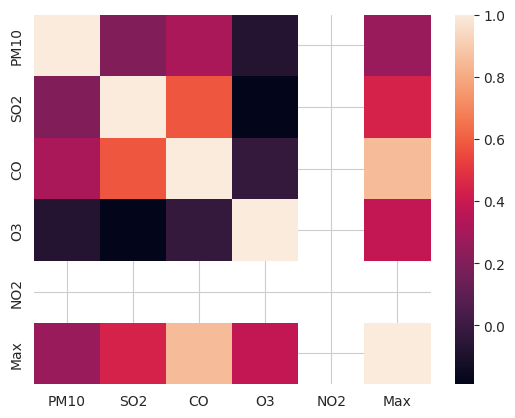

In [ ]:
sns.heatmap(corelation, xticklabels = corelation.columns, yticklabels = corelation.columns)

Dari hasil diatas, terdapat korelasi yang tinggi pada NO2

## Preparation Data

In [ ]:
# Mengubah variabel kategorik menjadi variabel numerik
# karena unhealthy sudah dihapus maka hanya terdapat kategori moderate dan good
pollutant.replace(['Moderate', 'Good'], [0,1], inplace = True)

### Statistics Descriptive

In [ ]:
pollutant.describe()

,PM10,SO2,CO,O3,NO2,Max,Category
count,360.000000,360.000000,360.000000,360.000000,360.0,360.000000,360.000000
mean,19.575000,0.988889,29.502778,15.911111,0.0,34.219444,0.813889
std,8.983733,0.981664,18.064107,14.191209,0.0,17.412868,0.389738
min,3.000000,0.000000,0.000000,0.000000,0.0,11.000000,0.000000
25%,14.000000,0.000000,17.000000,7.000000,0.0,21.000000,1.000000
50%,18.000000,1.000000,23.000000,14.000000,0.0,28.000000,1.000000
75%,23.000000,2.000000,38.250000,21.000000,0.0,44.000000,1.000000
max,60.000000,6.000000,97.000000,81.000000,0.0,97.000000,1.000000


In [ ]:
# Untuk melihat nilai rata-rata/mean dari setiap kolomnya
pollutant.mean()

<ipython-input-13-508fd0ccfb18>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  pollutant.mean()


PM10        19.575000
SO2          0.988889
CO          29.502778
O3          15.911111
NO2          0.000000
Max         34.219444
Category     0.813889
dtype: float64

In [ ]:
pollutant.head()

,Date,PM10,SO2,CO,O3,NO2,Max,Critical Component,Category
0,1/1/2020,30,2,69,19,0,69,CO,0
1,1/2/2020,16,2,58,33,0,58,CO,0
2,1/3/2020,12,2,46,18,0,46,CO,1
3,1/4/2020,8,2,84,29,0,84,CO,0
4,1/5/2020,8,3,50,0,0,50,CO,1


In [ ]:
X = pollutant.loc[:, ['PM10', 'SO2', 'CO', 'O3', 'NO2', 'Max']]
X.head()

,PM10,SO2,CO,O3,NO2,Max
0,30,2,69,19,0,69
1,16,2,58,33,0,58
2,12,2,46,18,0,46
3,8,2,84,29,0,84
4,8,3,50,0,0,50


In [ ]:
Y = pollutant.loc[:, ['Category']]
Y.head()

,Category
0,0
1,0
2,1
3,0
4,1


In [ ]:
# Membagi data menjadi data training dan data testing
from sklearn.model_selection import train_test_split
from sklearn import datasets

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 66, stratify = Y)

In [ ]:
len(X)

360

In [ ]:
len(X_train)

288

In [ ]:
0.2 * 360

72.0

In [ ]:
len(X_test)

72

In [ ]:
# Import Libraries untuk Confusion Matrix dan Classification Report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### Metode 1 : Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb = GaussianNB()
nb.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [ ]:
# Nilai prediksi untuk Data Training
yhat_train = nb.predict(X_train)
yhat_train

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1])

In [ ]:
# Confusion Matrix untuk Data Training
cm_train = confusion_matrix(Y_train, yhat_train)
print(cm_train)

[[ 54   0]
 [ 10 224]]


In [ ]:
# Classification Report untuk Data Training
print(classification_report(yhat_train, Y_train))

              precision    recall  f1-score   support

           0       1.00      0.84      0.92        64
           1       0.96      1.00      0.98       224

    accuracy                           0.97       288
   macro avg       0.98      0.92      0.95       288
weighted avg       0.97      0.97      0.96       288



In [ ]:
# Nilai prediksi untuk Data Testing
yhat_test = nb.predict(X_test)
yhat_test

array([1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1])

In [ ]:
# Confusion Matrix untuk Data Testing
cm_test = confusion_matrix(Y_test, yhat_test)
print(cm_test)

[[13  0]
 [ 3 56]]


In [ ]:
# Classification Report untuk Data Testing
print(classification_report(yhat_test, Y_test))

              precision    recall  f1-score   support

           0       1.00      0.81      0.90        16
           1       0.95      1.00      0.97        56

    accuracy                           0.96        72
   macro avg       0.97      0.91      0.94        72
weighted avg       0.96      0.96      0.96        72



# Metode 2 : Support Vector Machine

### Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=66)

In [ ]:
y_train.head()

,Category
309,1
122,1
107,0
280,1
60,1


In [ ]:
from sklearn import preprocessing

In [ ]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled =  scaler.transform(X_train)
X_train = pd.DataFrame(X_scaled, columns=[X_train.columns])

In [ ]:
scaler = preprocessing.StandardScaler().fit(X_test)
X_scaled =  scaler.transform(X_test)
X_test = pd.DataFrame(X_scaled, columns=[X_test.columns])

### Train the Support Vector Classifier

In [ ]:
from sklearn.svm import SVC

In [ ]:
model = SVC()

In [ ]:
model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

### Predictions and Evaluations

In [ ]:
predictions = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(confusion_matrix(y_test,predictions))

[[17  4]
 [ 1 86]]


In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.81      0.87        21
           1       0.96      0.99      0.97        87

    accuracy                           0.95       108
   macro avg       0.95      0.90      0.92       108
weighted avg       0.95      0.95      0.95       108



In [ ]:
predictions = model.predict(X_train)

In [ ]:
print(confusion_matrix(y_train,predictions))

[[ 45   1]
 [  0 206]]


In [ ]:
print(classification_report(y_train,predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        46
           1       1.00      1.00      1.00       206

    accuracy                           1.00       252
   macro avg       1.00      0.99      0.99       252
weighted avg       1.00      1.00      1.00       252

